In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

In [2]:
matplotlib.rcParams['figure.figsize'] = (15.0, 7.8)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

warnings.filterwarnings("ignore")

sns.set(font='Tahoma')  # Tahoma is easy to read at small sizes

def save_fig(filename):
    new_filename = 'plots/' + filename.replace(' ', '-').lower()
    plt.savefig(new_filename, bbox_inches = 'tight', transparent=True)

In [3]:
LABELS = ['AI', 'Literature', 'Music', 'Politics', 'Science']

# Defining the data

In [4]:
# Micro F1
conceptnet_micro = np.array([
    [0.7658, 0.0227, 0.1269, 0.2387, 0.1821],
    [0.0699, 0.7177, 0.1037, 0.1304, 0.1523],
    [0.1848, 0.1436, 0.8618, 0.3680, 0.3231],
    [0.2122, 0.2430, 0.1839, 0.8925, 0.3045],
    [0.0759, 0.2335, 0.2566, 0.3836, 0.7840]
]) * 100

glove_micro = np.array([
    [0.7646, 0.2385, 0.1199, 0.3524, 0.4431],
    [0.1671, 0.7294, 0.2642, 0.3994, 0.1110],
    [0.0139, 0.0891, 0.8623, 0.4732, 0.3014],
    [0.0897, 0.2934, 0.1907, 0.8843, 0.1278],
    [0.1408, 0.2174, 0.2553, 0.3585, 0.7814]
]) * 100

MICRO_DATA = [
    (conceptnet_micro, 'Conceptnet'),
    (glove_micro, 'GloVe')
]


# Macro F1
conceptnet_macro = np.array([
    [0.7656, 0.0379, 0.0996, 0.2657, 0.3578],
    [0.1283, 0.6775, 0.2009, 0.2088, 0.2709],
    [0.1474, 0.2686, 0.7684, 0.2977, 0.1989],
    [0.1824, 0.2768, 0.2446, 0.8167, 0.1577],
    [0.2533, 0.3502, 0.2918, 0.3262, 0.7752]
]) * 100

glove_macro = np.array([
    [0.7692, 0.2330, 0.1660, 0.2476, 0.3426],
    [0.2214, 0.7029, 0.2239, 0.3566, 0.2557],
    [0.0342, 0.1952, 0.7721, 0.3683, 0.2368],
    [0.1235, 0.2330, 0.1319, 0.8857, 0.2020],
    [0.2034, 0.3257, 0.2976, 0.3182, 0.7698]
]) * 100

MACRO_DATA = [
    (glove_macro, 'GloVe'),
    (conceptnet_macro, 'Conceptnet')
]

# Plot confusion matrices

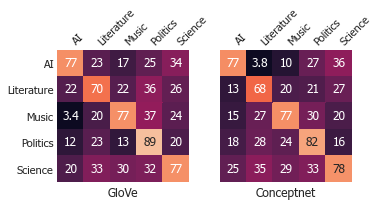

In [5]:
matplotlib.rcParams['figure.figsize'] = (6, 3)

def plot_confusion(data_embed, typ):
    fig, axn = plt.subplots(1, len(data_embed), sharey=True)
    cbar_horisontal_displacement = .905
    cbar_width = .02
    cbar_begin = .13
    cbar_len = .673
    #cbar_ax = fig.add_axes([cbar_horisontal_displacement, cbar_begin, cbar_width, cbar_len])

    for i, ax in enumerate(axn.flat):
        data, embed = data_embed[i]
        sns.heatmap(data, ax=ax,
                    cbar=i == 110,
                    vmin=0, vmax=100,
                    annot=True,
                    xticklabels=LABELS, yticklabels=LABELS,
                    square=True,
                    #fmt='.2f',
                    #cbar_ax=cbar_ax
                   )
        ax.xaxis.tick_top() # x axis on top
        ax.xaxis.set_label_position('top')
        ax.tick_params(length=0)
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_xticklabels(LABELS, ha='left')
        
        ax.tick_params(length=0)
        ax.tick_params(axis='y', labelrotation=0)
        ax.text(2.5, 5.55, embed, horizontalalignment='center')

    fig.tight_layout(rect=[0, 0, .9, 1])
    save_fig(f'{typ}-f1-confusion-2.pdf')
    plt.show()
    
    
plot_confusion(MACRO_DATA, 'macro')

# Average F1 Score on non-diagonal values

In [6]:
def get_avg_non_train_score(matrix):
    indices = ~np.eye(len(matrix), dtype=bool)
    non_train_vals = matrix[indices]
    return np.mean(non_train_vals)


micro = {
    'Conceptnet': get_avg_non_train_score(conceptnet_micro),
    'GloVe': get_avg_non_train_score(glove_micro)
}

macro = {
    'Conceptnet': get_avg_non_train_score(conceptnet_macro),
    'GloVe': get_avg_non_train_score(glove_macro)
}


rows = [{'Metric': metric, 'Embedding': embed, 'Score': val}
        for dictt, metric in [(micro, 'F1 Micro'), (macro, 'F1 Macro')]
        for embed, val in dictt.items()]

df = pd.DataFrame(rows)
df

,Metric,Embedding,Score
0,F1 Micro,Conceptnet,19.6970
1,F1 Micro,GloVe,23.2340
2,F1 Macro,Conceptnet,22.8275
3,F1 Macro,GloVe,23.5830


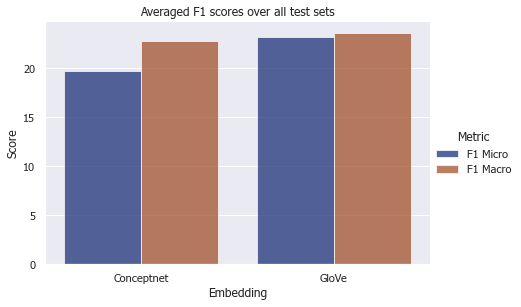

In [7]:
sns.catplot(data=df, kind='bar', x='Embedding', y='Score', hue='Metric',
            palette='dark', alpha=.7, aspect=1.5, height=4)
plt.title('Averaged F1 scores over all test sets')
save_fig('embed-f1-scores.pdf')
plt.show()

# Sample plot for comparison with LUKE

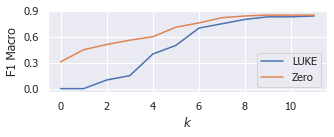

In [8]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
luke = [0, 0, 0.1, 0.15, 0.4, 0.5, 0.7, 0.75, 0.8, 0.83, 0.83, 0.84]
zero = [0.31, 0.45, 0.51, 0.56, 0.60, 0.71, 0.76, 0.82, 0.84, 0.85, 0.85, 0.85]

matplotlib.rcParams['figure.figsize'] = (5, 1.5)

plt.plot(x, luke, label='LUKE')
plt.plot(x, zero, label='Zero')
plt.xticks([0, 2, 4, 6, 8, 10])
plt.yticks([0, 0.3, 0.6, 0.9])
plt.xlabel('$k$')
plt.ylabel('F1 Macro')
plt.legend()
save_fig('luke-compare.pdf')
plt.show()